### Movie Revenue Prediction and Success Classification

The project scope in to analyse movie datasets to try to predict flops, successes and major successes.

To start the analysis we are going to use the "Top 500 Hollywood Movies of All Time" (https://www.kaggle.com/datasets/joebeachcapital/top-500-hollywood-movies-of-all-time?sort=published) to understand if there are different types of successes in the movie industry and to make a predictor using only a few features (in the next step down below, we are going to bring more movies and features).

In [1]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
file_path = "/kaggle/input/top-500-hollywood-movies-of-all-time/Most Profitable Movies of All Time - Top 500 Movies.csv"
movies_df = pd.read_csv(file_path)

# Displaying the first few rows
movies_df.head()


,title,worldwide gross (m),% budget recovered,X times budget recovered,budget (millions),domestic gross (m),domestic %,international gross (m),% of gross from international,worldwide gross,year,decade,source,budget source,force label,horror
0,300,456.0,702%,7.0,65.0,211.0,46.2%,245.0,53.8%,456082343,2007,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror
1,1917,385.0,427%,4.3,90.0,159.0,41.4%,225.0,58.6%,384576334,2019,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://www.nytimes.com/2020/01/12/movies/1917...,NaN,not horror
2,2012,791.0,396%,4.0,200.0,166.0,21.0%,625.0,79.0%,791217826,2009,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror
3,101 Dalmatians,321.0,479%,4.8,67.0,136.0,42.5%,185.0,57.5%,320689294,1996,1990's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://en.wikipedia.org/wiki/101_Dalmatians_(...,NaN,not horror
4,22 Jump Street,331.0,663%,6.6,50.0,192.0,57.9%,140.0,42.1%,331333876,2014,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror


In [2]:
# Data Cleaning

# Checking for missing values
missing_values = movies_df.isnull().sum()

# Checking for duplicate rows
duplicate_rows = movies_df.duplicated().sum()

# Checking data types
data_types = movies_df.dtypes

missing_values, duplicate_rows, data_types


(title                              0
 worldwide gross (m)                0
 % budget recovered                 0
 X times budget recovered           0
 budget  (millions)                 0
 domestic gross (m)                 0
 domestic %                         0
 international gross (m)            0
 % of gross from international      0
 worldwide gross                    0
 year                               0
 decade                             0
 source                            81
 budget source                    163
 force label                      557
 horror                             0
 dtype: int64,
 0,
 title                             object
 worldwide gross (m)              float64
 % budget recovered                object
 X times budget recovered         float64
 budget  (millions)               float64
 domestic gross (m)               float64
 domestic %                        object
 international gross (m)          float64
 % of gross from international     ob

In [3]:
# Dropping the 'force label' column as it has a significant number of missing values
movies_df.drop(columns=['force label'], inplace=True)

# Converting percentage columns to numerical types by removing the percentage symbol and converting to float
percentage_columns = ['% budget recovered', 'domestic %', '% of gross from international']
for col in percentage_columns:
    movies_df[col] = movies_df[col].str.rstrip('%').astype('float') / 100

# Checking the first few rows after cleaning
movies_df.head()


,title,worldwide gross (m),% budget recovered,X times budget recovered,budget (millions),domestic gross (m),domestic %,international gross (m),% of gross from international,worldwide gross,year,decade,source,budget source,horror
0,300,456.0,7.02,7.0,65.0,211.0,0.462,245.0,0.538,456082343,2007,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,not horror
1,1917,385.0,4.27,4.3,90.0,159.0,0.414,225.0,0.586,384576334,2019,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://www.nytimes.com/2020/01/12/movies/1917...,not horror
2,2012,791.0,3.96,4.0,200.0,166.0,0.210,625.0,0.790,791217826,2009,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,not horror
3,101 Dalmatians,321.0,4.79,4.8,67.0,136.0,0.425,185.0,0.575,320689294,1996,1990's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://en.wikipedia.org/wiki/101_Dalmatians_(...,not horror
4,22 Jump Street,331.0,6.63,6.6,50.0,192.0,0.579,140.0,0.421,331333876,2014,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,not horror


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


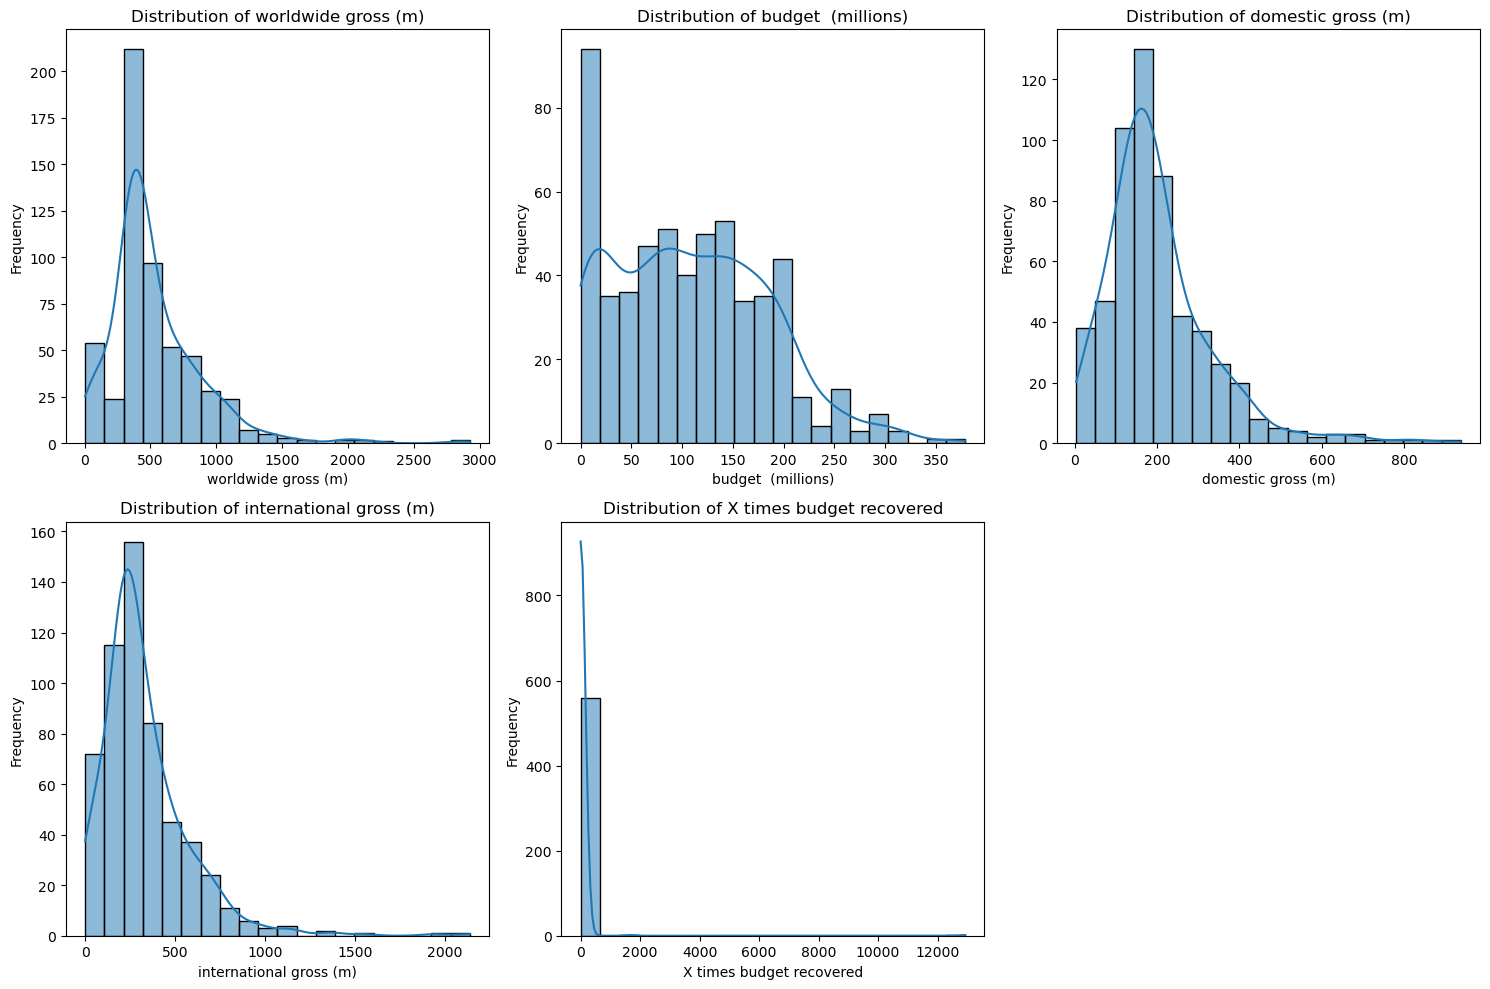

In [4]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables to plot
numerical_columns = [
    'worldwide gross (m)',
    'budget  (millions)',
    'domestic gross (m)',
    'international gross (m)',
    'X times budget recovered'
]

# Plotting histograms for the numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(movies_df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here's what the histograms reveal about the distribution of the key numerical variables:

**Worldwide Gross Revenue**: Most movies fall in the lower range of gross revenue, with a few exceptions reaching very high revenues. This indicates a right-skewed distribution.

**Budget**: The budget distribution is also right-skewed, with most movies having a lower budget and a few having a substantially higher budget.

**Domestic Gross**: Similar to worldwide gross, the distribution of domestic gross revenue is right-skewed.
International Gross: The international gross revenue follows a similar pattern, with most movies earning lower revenue internationally.

**Times Budget Recovered**: This distribution shows how many times a movie has recovered its budget. Most movies recover their budget multiple times, but the distribution is again right-skewed, with few movies recovering their budget many times over.

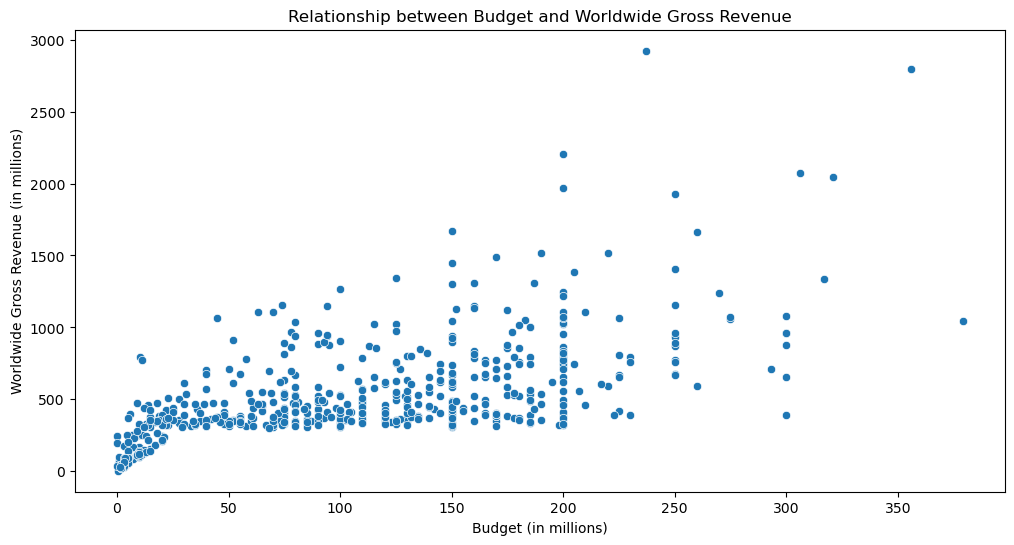

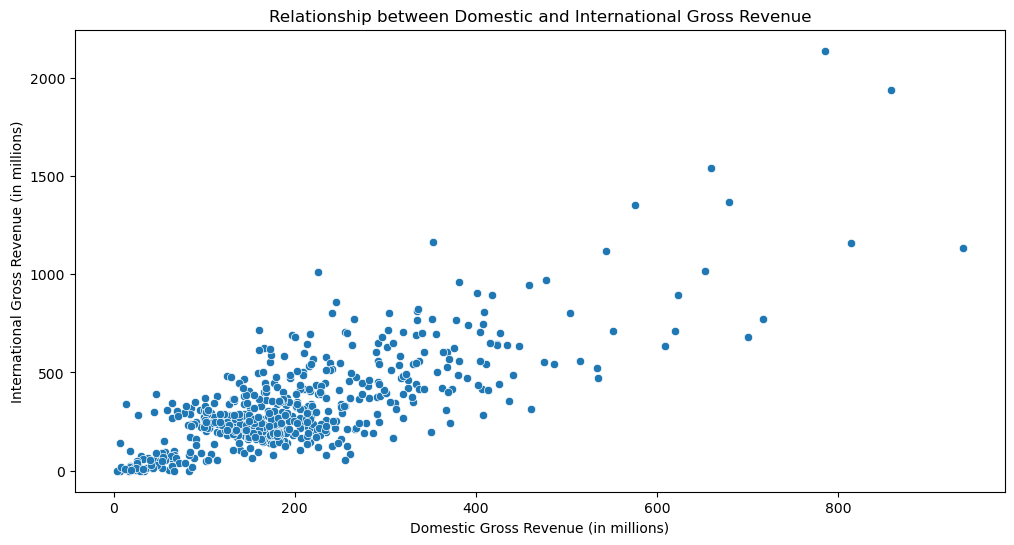

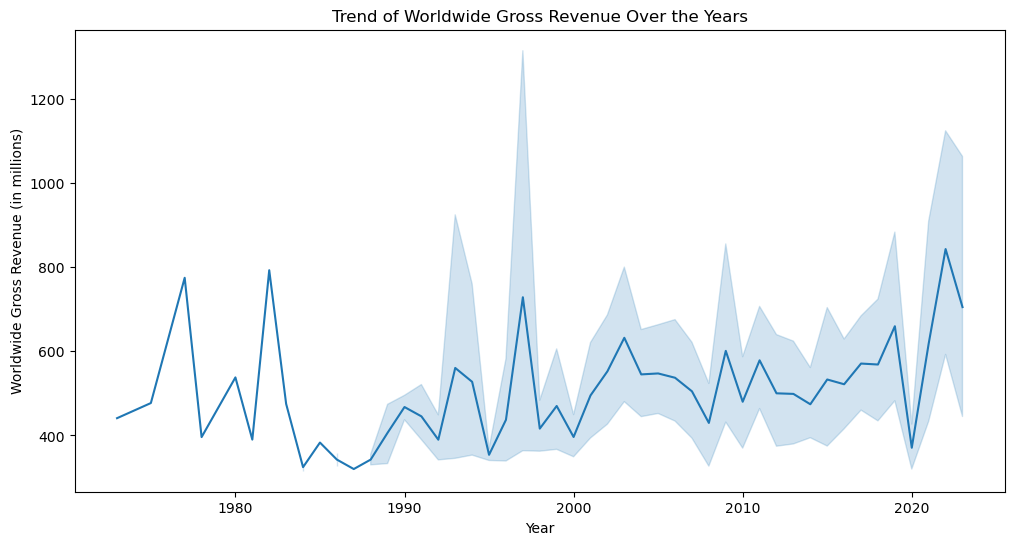

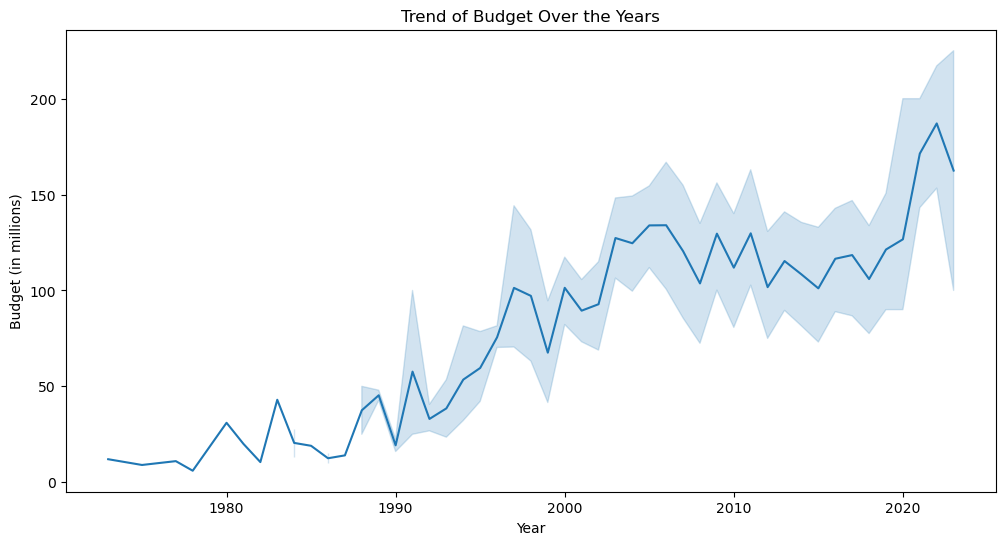

In [5]:
# Plotting the relationship between budget and worldwide gross revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget  (millions)', y='worldwide gross (m)', data=movies_df)
plt.title('Relationship between Budget and Worldwide Gross Revenue')
plt.xlabel('Budget (in millions)')
plt.ylabel('Worldwide Gross Revenue (in millions)')
plt.show()

# Plotting the relationship between domestic and international gross revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='domestic gross (m)', y='international gross (m)', data=movies_df)
plt.title('Relationship between Domestic and International Gross Revenue')
plt.xlabel('Domestic Gross Revenue (in millions)')
plt.ylabel('International Gross Revenue (in millions)')
plt.show()

# Plotting the trend of worldwide gross revenue over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='worldwide gross (m)', data=movies_df)
plt.title('Trend of Worldwide Gross Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Worldwide Gross Revenue (in millions)')
plt.show()

# Plotting the trend of budget over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='budget  (millions)', data=movies_df)
plt.title('Trend of Budget Over the Years')
plt.xlabel('Year')
plt.ylabel('Budget (in millions)')
plt.show()


Here's what we can infer from these visualizations:

**Relationship between Budget and Worldwide Gross Revenue**: There is a positive correlation between the budget of a movie and its worldwide gross revenue. Movies with higher budgets tend to generate higher revenues, but there are also some movies with relatively lower budgets that have performed exceptionally well.

**Relationship between Domestic and International Gross Revenue**: This scatter plot shows a positive relationship between domestic and international gross revenue. Movies that perform well domestically often perform well internationally too, although there are some exceptions.

**Trend of Worldwide Gross Revenue Over the Years**: The line plot shows an upward trend in worldwide gross revenue over the years. This could reflect the growth of the global film market and increasing accessibility to movies across different regions.

**Trend of Budget Over the Years**: The budget trend also seems to be increasing over time, reflecting the industry's willingness to invest more in production as the potential for revenue grows.

In [6]:
# K-means analysis

# to see if the movies tend to be organized in groups

from sklearn.cluster import KMeans

# Selecting the features for clustering
clustering_features_simple = ['budget  (millions)', 'worldwide gross (m)', '% of gross from international', 'year']
X_clustering_simple = movies_df[clustering_features_simple]

# Fitting k-means with 3 clusters
kmeans_simple = KMeans(n_clusters=2, init='k-means++', random_state=42)
movies_df['cluster'] = kmeans_simple.fit_predict(X_clustering_simple)

# Grouping the data by clusters to analyze the characteristics
cluster_summary_simple = movies_df.groupby('cluster').mean()[clustering_features_simple]
cluster_summary_simple['number_of_movies'] = movies_df['cluster'].value_counts()
print(cluster_summary_simple)


         budget  (millions)  worldwide gross (m)  \
cluster                                            
0                175.180769          1035.538462   
1                 88.382789           381.622222   

         % of gross from international         year  number_of_movies  
cluster                                                                
0                             0.641123  2012.276923               130  
1                             0.573245  2008.877315               432  


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_20/3529907037.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary_simple = movies_df.groupby('cluster').mean()[clustering_features_simple]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

The optimal number of clusters (k) is: 2


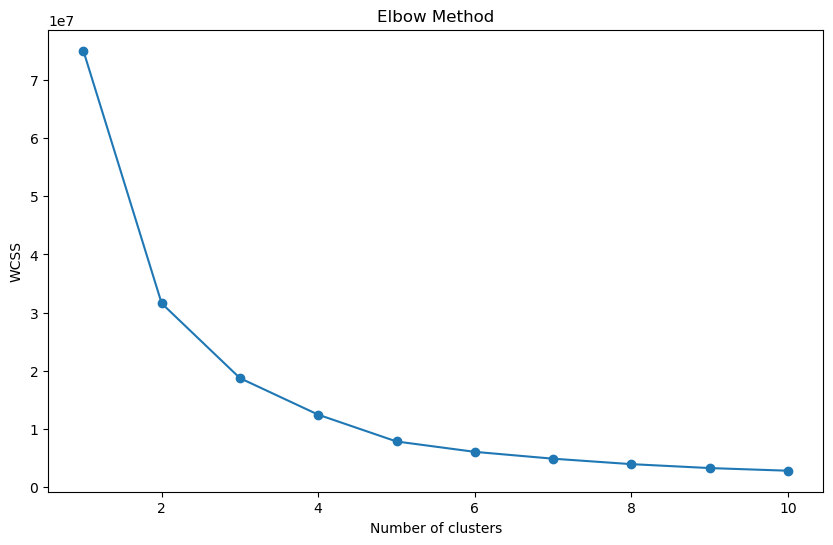

In [7]:
# Elbow method to check if we are using the best k value for k-means

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the features for clustering
clustering_features_simple = ['budget  (millions)', 'worldwide gross (m)', '% of gross from international', 'year']
X_clustering_simple = movies_df[clustering_features_simple]

# Finding the optimal number of clusters using the Elbow method
wcss = [] # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_clustering_simple)
    wcss.append(kmeans.inertia_)

# Finding the optimal k by looking for the "elbow" point
# Calculating the second derivative of the WCSS
second_derivative = [0] + [wcss[i] - 2 * wcss[i + 1] + wcss[i + 2] for i in range(len(wcss) - 2)] + [0]

# The optimal k is where the second derivative is maximum
optimal_k = second_derivative.index(max(second_derivative)) + 1

print(f"The optimal number of clusters (k) is: {optimal_k}")

# Plotting the Elbow method graph (optional)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


... so, k=2 is the best

/tmp/ipykernel_20/2577879180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_clustering['cluster'] = movies_df_clustering['cluster'].astype(str)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


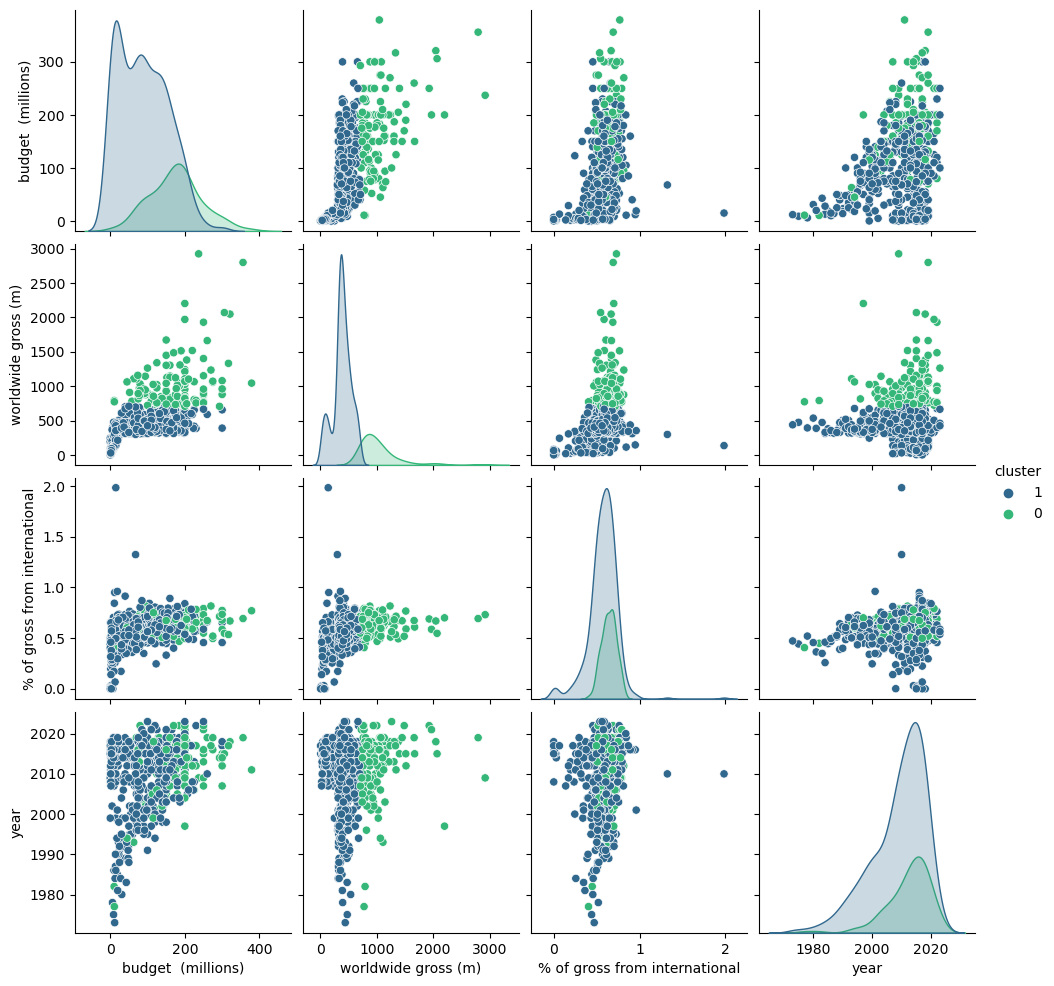

In [8]:
# Understanding the results of the k-means

import seaborn as sns

# Assuming you have already run the k-means clustering code
# Selecting the features used for clustering
clustering_features_all = ['budget  (millions)', 'worldwide gross (m)', '% of gross from international', 'year']
movies_df_clustering = movies_df[clustering_features_all + ['cluster']]

# Replacing the cluster labels with string labels for better visualization
movies_df_clustering['cluster'] = movies_df_clustering['cluster'].astype(str)

# Creating a pairplot to visualize all possible XY graphs of every k-means group
sns.pairplot(movies_df_clustering, hue='cluster', palette='viridis', diag_kind='kde')
plt.show()


So the final results of the k-means analysis is that we can group these movies in 2 categories:

**Cluster 0**) movies with worldwide gross revenue > ~800 M USD and an average budget of about 200 M USD

**Cluster 1**)  movies with worldwide revenue < ~800 M USD and an average budget of about 100 M USD (this measure with a much higer stardard deviation)

In [9]:
# Worldwide Gross Revenue Predictor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Selecting features and target variable
features = ['budget  (millions)', 'year']
X = movies_df[features]
y = movies_df['worldwide gross (m)']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 199.14025541472932


In other words... the model gets the gross revenue wrong with an average distance of the real value of ~200 M USD!

As expected, only using budget and year leads to a very bad predictor (otherwise, the studios would only need to spend big budgets to get great results), but using this dataset we cannot improve the results by a lot... so we need more data

### Bringing more data

As we have seen the dataset used led to some interesting findings, but we need another dataset to make better predictions, so now we are using the "The Movies Dataset" (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

... it has many features for 45 000 movies, not the success and super success, but also the flops

To use it we are going to clean and transform the data and also create some new features:

- Create a ROI column (using this formula revenue - budget / budget) (ROI = return on investment)

- Categorical column with: flop if <1 roi, success if >1 roi, major sucess if >2 roi

The ROI > 1 is commonly used to say if a movie was a success (because marketing costs usually are similar to the budget) and if we use the averages for revenue and budget for the Cluster 0 in the previously analysis we would get ROI > 2

And, we are going to try to predict both the revenue and the "ROI category'

Step 1. Cleaning the data and feature engineering

In [10]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split

# Loading the dataset again
movies_df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv', low_memory=False)

# Dropping rows where budget or revenue is 0 or NaN
movies_df = movies_df[movies_df['budget'].astype(str).str.isnumeric()]  # Ensuring budget values are numeric
movies_df['budget'] = movies_df['budget'].astype(float)
movies_df = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]

# Creating the ROI column
movies_df['ROI'] = (movies_df['revenue'] - movies_df['budget']) / movies_df['budget']

# Creating the success category column based on ROI
movies_df['success_category'] = 'Flop'
movies_df.loc[movies_df['ROI'] > 1, 'success_category'] = 'Success'
movies_df.loc[movies_df['ROI'] > 2, 'success_category'] = 'Major Success'

# Extracting the main genre for each movie
def extract_main_genre(genres_str):
    try:
        genres_list = json.loads(genres_str.replace("'", "\""))
        # Ensuring "Science Fiction" remains intact
        genres_names = [genre['name'] for genre in genres_list]
        for name in genres_names:
            if 'Science Fiction' in name:
                return 'Science Fiction'
        return genres_names[0]
    except:
        return 'Unknown'

movies_df['main_genre'] = movies_df['genres'].apply(extract_main_genre)

# Extracting the main production country for each movie
def extract_main_country(countries_str):
    try:
        countries_list = json.loads(countries_str.replace("'", "\""))
        return countries_list[0]['iso_3166_1']
    except:
        return 'Unknown'

movies_df['main_production_country'] = movies_df['production_countries'].apply(extract_main_country)

# Displaying the first few rows with the new columns
movies_df[['title', 'budget', 'revenue', 'ROI', 'success_category', 'main_genre', 'main_production_country']].head()


,title,budget,revenue,ROI,success_category,main_genre,main_production_country
0,Toy Story,30000000.0,373554033.0,11.451801,Major Success,Animation,US
1,Jumanji,65000000.0,262797249.0,3.043035,Major Success,Adventure,US
3,Waiting to Exhale,16000000.0,81452156.0,4.090760,Major Success,Comedy,US
5,Heat,60000000.0,187436818.0,2.123947,Major Success,Action,US
8,Sudden Death,35000000.0,64350171.0,0.838576,Flop,Action,US


Step 2. Building the models

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Defining the features and target variable for regression
X_reg = movies_df[['budget', 'main_genre', 'main_production_country']]
y_reg = movies_df['revenue']

# Splitting the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Building preprocessing pipelines
numerical_transformer_reg = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer_reg = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessing using ColumnTransformer
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_reg, ['budget']),
        ('cat', categorical_transformer_reg, ['main_genre', 'main_production_country'])
    ])

# Creating the Random Forest regressor pipeline
reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor_reg),
                               ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
                              ])

# Training the regression model
reg_pipeline.fit(X_train_reg, y_train_reg)

# Predicting on the test set
y_pred_reg = reg_pipeline.predict(X_test_reg)

# Evaluating the regressor's performance using Mean Absolute Error (MAE)
mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)

mae_reg


58689141.586066216

The regression model, designed to predict movie revenue, yields a Mean Absolute Error (MAE) of approximately USD 58,689,141.59. This suggests that, on average, the model's predictions deviate from the actual revenue values by roughly USD 58.7 million. Much better than the 200 M of the previously model

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Defining the features and target variable for classification
X_class = movies_df[['budget', 'main_genre', 'main_production_country']]
y_class = movies_df['success_category']

# Splitting the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Creating the Random Forest classifier pipeline
class_pipeline = Pipeline(steps=[('preprocessor', preprocessor_reg),
                                 ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
                                ])

# Training the classification model
class_pipeline.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_class = class_pipeline.predict(X_test_class)

# Evaluating the classifier's performance
accuracy_class = accuracy_score(y_test_class, y_pred_class)
class_report_class = classification_report(y_test_class, y_pred_class)

accuracy_class, class_report_class


(0.467966573816156,
 '               precision    recall  f1-score   support\n\n         Flop       0.54      0.61      0.58       533\nMajor Success       0.41      0.43      0.42       376\n      Success       0.18      0.09      0.12       168\n\n     accuracy                           0.47      1077\n    macro avg       0.38      0.38      0.37      1077\n weighted avg       0.44      0.47      0.45      1077\n')

Here's the detailed classification report:

Accuracy: 46.80 %

**Flop**:

Precision: 
0.54

Recall: 
0.61

F1-score: 
0.58

**Major Success**:

Precision: 
0.41

Recall: 
0.43

F1-score: 
0.42

**Success**:

Precision: 
0.18

Recall: 
0.09

F1-score: 
0.12

While the model performs relatively well in predicting the "Flop" and "Major Success" categories, it struggles with the "Success" category. The challenge might arise from the dataset's imbalanced nature, with fewer samples for some categories than others

Step 3. Seeing the results

In [13]:
# Retrieving a sample of 20 movies from the classification test set
sample_movies_class = X_test_class.sample(n=20, random_state=42)

# Extracting the corresponding true and predicted success categories and revenues
sample_movies_true_labels_class = y_test_class.loc[sample_movies_class.index]
sample_movies_predicted_labels_class = pd.Series(y_pred_class, index=y_test_class.index).loc[sample_movies_class.index]

sample_movies_true_revenue = y_test_reg.loc[sample_movies_class.index]
sample_movies_predicted_revenue = pd.Series(y_pred_reg, index=y_test_reg.index).loc[sample_movies_class.index]

# Combining the features, true labels, and predicted labels into a single DataFrame for the sample
sample_movies_display_class = sample_movies_class.copy()
sample_movies_display_class['Movie Title'] = movies_df['title'].loc[sample_movies_class.index]
sample_movies_display_class['True Revenue (millions)'] = sample_movies_true_revenue / 1e6
sample_movies_display_class['Predicted Revenue (millions)'] = sample_movies_predicted_revenue / 1e6
sample_movies_display_class['True Success Category'] = sample_movies_true_labels_class
sample_movies_display_class['Predicted Success Category'] = sample_movies_predicted_labels_class

sample_movies_display_class.reset_index(drop=True, inplace=True)
sample_movies_display_class[['Movie Title', 'budget', 'main_genre', 'main_production_country', 
                             'True Revenue (millions)', 'Predicted Revenue (millions)', 
                             'True Success Category', 'Predicted Success Category']]

,Movie Title,budget,main_genre,main_production_country,True Revenue (millions),Predicted Revenue (millions),True Success Category,Predicted Success Category
0,Alone With Her,1000000.0,Crime,US,0.010018,4.639657,Flop,Flop
1,The Boss Baby,125000000.0,Animation,US,498.814908,431.050462,Major Success,Major Success
2,Life During Wartime,4500000.0,Comedy,US,0.744816,44.329807,Flop,Flop
3,Nim's Island,37000000.0,Adventure,US,100.076342,261.339447,Success,Major Success
4,A Hologram for the King,30000000.0,Comedy,MX,4.212494,64.030221,Flop,Flop
5,Arbitrage,12000000.0,Drama,US,35.485056,33.653937,Success,Flop
6,Little Man,64000000.0,Comedy,US,101.595121,290.050486,Flop,Major Success
7,90 Minutes in Heaven,5000000.0,Drama,US,4.842699,11.298181,Flop,Flop
8,College,7000000.0,Comedy,US,6.230276,24.608836,Flop,Flop
9,Scarface,25000000.0,Action,US,65.884703,51.080344,Success,Flop


### Conclusions:

The model works much better than the previously one (MAE of ~60 M comparing to ~200 M), this could be because we are using movies with smaller budgets, so more research is needed. Also, the model struggled a lot to make the success status predictions, a quick fix maybe trying to use the estimated budgets to make a new ROI estimated column.

This work highly suggests that it is very possible to predict flops and success with only information available in the making or even before the making of the movie... knowing that Hollywood looses hundreds of millions of dollars per year with flops, research in this direction is highly recommended.

(fallowing are the more technical conclusions)

#### Regression Model (Revenue Prediction):

- The Mean Absolute Error (MAE) is approximately USD 58.7 million. While this might seem significant, it's essential to consider the range and scale of movie revenues, which can vary widely from a few thousand dollars to billions.

- For movies like "The Boss Baby" and "Happy Feet", the predictions are reasonably close to the actual revenue.

- However, for movies like "Nim's Island" and "Little Man", the predictions are notably higher than the actual revenue.

#### Classification Model (Success Category Prediction):

- The model's accuracy is approximately 46.80%. The model has a higher precision and recall for the categories "Flop" and "Major Success" but struggles with the "Success" category. This is evident in movies like "Scarface" and "Four Christmases" where the true category is "Success", but the model predicted "Flop".

- The imbalanced nature of the dataset might be a reason for this. There might be fewer samples of movies categorized as "Success" compared to the other categories.

#### Observations:

- Both models seem to have a bias towards predicting movies as either "Flop" or "Major Success". This could be due to the imbalanced distribution of the success categories in the dataset.

- The regression model, in some cases, tends to overestimate the revenue, especially for movies with moderate budgets.

#### Potential Next Steps:

- Data Augmentation & Resampling: Address the imbalance in the dataset, especially for the classification model. Techniques like oversampling, undersampling, or synthetic data generation can help.

- Hyperparameter Tuning: Tune the hyperparameters of the models using techniques like grid search or random search to optimize performance.

- Feature Engineering: Consider adding more features or transforming existing ones to improve the models. Features like director, cast, or user ratings could be influential.

- Ensemble Methods: Use ensemble methods like boosting or stacking to potentially improve the model's accuracy.

- Deep Learning: Given the complex nature of movie success, neural networks might be able to capture intricate patterns in the data.

- External Data: Integrate data from other sources, such as social media buzz, critic reviews, or awards, which can provide additional context and predictive power.

Extra Step. Trying to use neural networks to get a better classification model

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



# Data Preparation
encoder = OneHotEncoder(sparse=False)
scaler = MinMaxScaler()

# One-hot encoding categorical features
categorical_features_reg = encoder.fit_transform(movies_df[['main_genre', 'main_production_country']])
scaled_features_reg = scaler.fit_transform(movies_df[['budget']])
X = np.hstack([scaled_features_reg, categorical_features_reg])
y = movies_df['revenue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network for Regression
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mean_squared_error')
model_reg.summary()

# Training the Model
history_reg = model_reg.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the Model
y_pred = model_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Revenue Prediction: ${mae:.2f}")


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5376      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,489
Trainable params: 7,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
108/108 [==============================] - 1s 5ms/step - loss: 39748255877169152.0000 - val_loss: 32622546503335936.0000
Epoch 2/50
108/108 [==============================] - 0s 3ms/step - loss: 39748255877169152.0000 - val_loss: 32622525028499456.0000
Epoch 3/50
108/108 [==============================] - 

In [15]:

# Data Preparation for Classification
categorical_features_class = encoder.fit_transform(movies_df[['main_genre', 'main_production_country']])
scaled_features_class = scaler.fit_transform(movies_df[['budget']])
X_class = np.hstack([scaled_features_class, categorical_features_class])
y_class = movies_df['success_category']

# Encoding the success categories for Neural Network
label_encoder = OneHotEncoder(sparse=False)
y_class_encoded = label_encoder.fit_transform(y_class.values.reshape(-1, 1))

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)

# Neural Network for Classification
model_class = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_class.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_class.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_class.summary()

# Training the Model
history_class = model_class.fit(X_train_class, y_train_class, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the Model
loss, accuracy = model_class.evaluate(X_test_class, y_test_class, verbose=0)
print(f"Accuracy for Success Category Prediction: {accuracy*100:.2f}%")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                5376      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 7,555
Trainable params: 7,555
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
108/108 [==============================] - 2s 5ms/step - loss: 1.0073 - accuracy: 0.4943 - val_loss: 0.9958 - val_accuracy: 0.5017
Epoch 2/50
108/108 [==============================] - 0s 3ms/step - loss: 0.9827 - accuracy: 0.4964 - val_loss: 0.9933 - val_accuracy: 0.5145
Epoch 3/50
108/108 [==============================] - 0s 3ms/step - loss: 0.9735 - accuracy: 0.4999 - val_loss: 0.9952 - val_accuracy: 0.5168
Epoch 4/50
108/108 [==============================] - 0s 3ms/step - loss: 0.9669 - accuracy: 0.5089 - val_loss: 0.9980 - val_accuracy: 0.5110
Epoch 5/50
108/108 [==============================] - 0s 3ms/step - loss: 0.9603 - accuracy: 0.5190 - val_loss: 0.9950 - val_accuracy: 0.5192
Epoch 6/50
108/108 [==============================] - 0s 3ms/step - loss: 0.9561 - accuracy: 0.5199 - val_loss: 0.9997 - val_accuracy: 0.5145
Epoch 7/50
108/108 [==============================] - 0s 3ms/step - loss: 0.9528 - accuracy: 0.5141 - val_loss: 1.0024 - val_accuracy: 0.5192
Epoch 

With simple and fast neural nets we improved the classification accuracy from 47% to 53%, leading us to belive that there actually are complex patterns in the data